# Task 3

This notebook is part of Milestone 3, Question 3. You can work on this notebook on your laptop to develop your machine learning model using all the learnings from the previous courses. At the end of this notebook, when you are ready to train the model, you will need to obtain the hyperparameters from the hyperparameter tuning job that you will run in Milestone 3 Question 4 (i.e., the notebook named `Milestone3-Task4.ipynb`).

PS: To speed up the process, you can test the model without the hyperparameters first. Once other team members obtain the hyperparameters, you can retrain the model using those hyperparameters and test it again.

In [1]:
# Uncomment to install.
# %pip install joblib scikit-learn matplotlib s3fs

# Imports

In [2]:
import numpy as np
import pandas as pd
import os
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
# ## add any other additional packages that you need. You are free to use any packages for vizualization.
# %pip install boto3

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [3]:
## Use your ML skills to get from step 1 to step 6

In [4]:
# Step 1: Read the data CSV from the s3 bucket.

# Remember by default it looks for credentials in home directory. 
# Make sure your updated credentials are in home directory
# or pass credentials explicitly and pass as storage_options=aws_credentials (not a good idea)
# aws_credentials = {"key": "","secret": "","token":""}
# replace with s3 path to your data
df = pd.read_csv('s3://mds2023-group6/output/ml_data_SYD.csv')
df['time'] = pd.to_datetime(df['time']).dt.date
df = df.set_index('time')
df.head()
df.shape

(46020, 26)

In [5]:
# Step 2: Drop rows with nans.
df = df.dropna()
df.shape

(45989, 26)

In [6]:
# Step 3: Split the data into train (80%) and test (20%) portions with random_state=123.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123, shuffle=False)

In [7]:
X_train = train_df.drop(columns=['observed'])
y_train = train_df['observed']

X_test = test_df.drop(columns=['observed'])
y_test = test_df['observed']

In [8]:
# Step 4: Carry out EDA of your choice on the train split.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36791 entries, 1889-01-01 to 1989-10-19
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ACCESS-CM2        36791 non-null  float64
 1   ACCESS-ESM1-5     36791 non-null  float64
 2   AWI-ESM-1-1-LR    36791 non-null  float64
 3   BCC-CSM2-MR       36791 non-null  float64
 4   BCC-ESM1          36791 non-null  float64
 5   CMCC-CM2-HR4      36791 non-null  float64
 6   CMCC-CM2-SR5      36791 non-null  float64
 7   CMCC-ESM2         36791 non-null  float64
 8   CanESM5           36791 non-null  float64
 9   EC-Earth3-Veg-LR  36791 non-null  float64
 10  FGOALS-g3         36791 non-null  float64
 11  GFDL-CM4          36791 non-null  float64
 12  INM-CM4-8         36791 non-null  float64
 13  INM-CM5-0         36791 non-null  float64
 14  KIOST-ESM         36791 non-null  float64
 15  MIROC6            36791 non-null  float64
 16  MPI-ESM-1-2-HAM   36791 non-nul

In [9]:
X_train.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MIROC6,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1
count,36791.000000,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,3.679100e+04,36791.000000,3.679100e+04,...,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,3.679100e+04,3.679100e+04
mean,2.418944,2.896285,3.664706e+00,2.211732e+00,2.767789e+00,3.101337,3.595210e+00,3.498250e+00,2.966061,2.597035e+00,...,3.068066e+00,3.212287e+00,1.322584e+00,2.079747e+00,1.491225e+00,1.722461e+00,2.445703,2.838375,3.319782e+00,3.441402e+00
std,6.781286,6.879413,7.214366e+00,6.544580e+00,6.010654e+00,6.500920,7.387164e+00,7.078336e+00,7.024007,5.798388e+00,...,7.663720e+00,6.922027e+00,4.920043e+00,5.407070e+00,4.838441e+00,4.845465e+00,5.808536,6.980070,7.882558e+00,7.571911e+00
min,0.000000,0.000000,9.161142e-14,4.370610e-24,1.107181e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,1.044483e-31,3.315622e-13,1.088608e-13,9.204019e-14,9.479186e-33,1.429162e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14
25%,0.054225,0.021811,2.585608e-02,4.033173e-04,2.657978e-03,0.138223,8.795451e-02,9.175020e-02,0.023616,1.287460e-02,...,1.901170e-02,1.408160e-04,1.271249e-13,1.357380e-13,5.740648e-05,1.852582e-13,0.005352,0.009713,3.741288e-02,4.905343e-02
50%,0.190864,0.491260,5.759248e-01,9.092876e-02,3.053905e-01,0.633034,8.247926e-01,8.422411e-01,0.368521,4.410744e-01,...,3.502401e-01,2.130571e-01,1.659617e-03,1.172821e-01,3.069196e-02,5.106960e-02,0.168483,0.248595,6.406431e-01,6.675421e-01
75%,1.418816,2.388891,3.547054e+00,1.332665e+00,2.526573e+00,3.185832,3.742353e+00,3.615350e+00,2.682899,2.351880e+00,...,2.279205e+00,2.703393e+00,3.560368e-01,1.218444e+00,6.646839e-01,7.905046e-01,1.822219,2.428031,3.206986e+00,3.211678e+00
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,109.098855,1.401478e+02,1.375916e+02,135.569753,1.342262e+02,...,1.671499e+02,9.306766e+01,1.038506e+02,8.005998e+01,1.051568e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.166465e+02


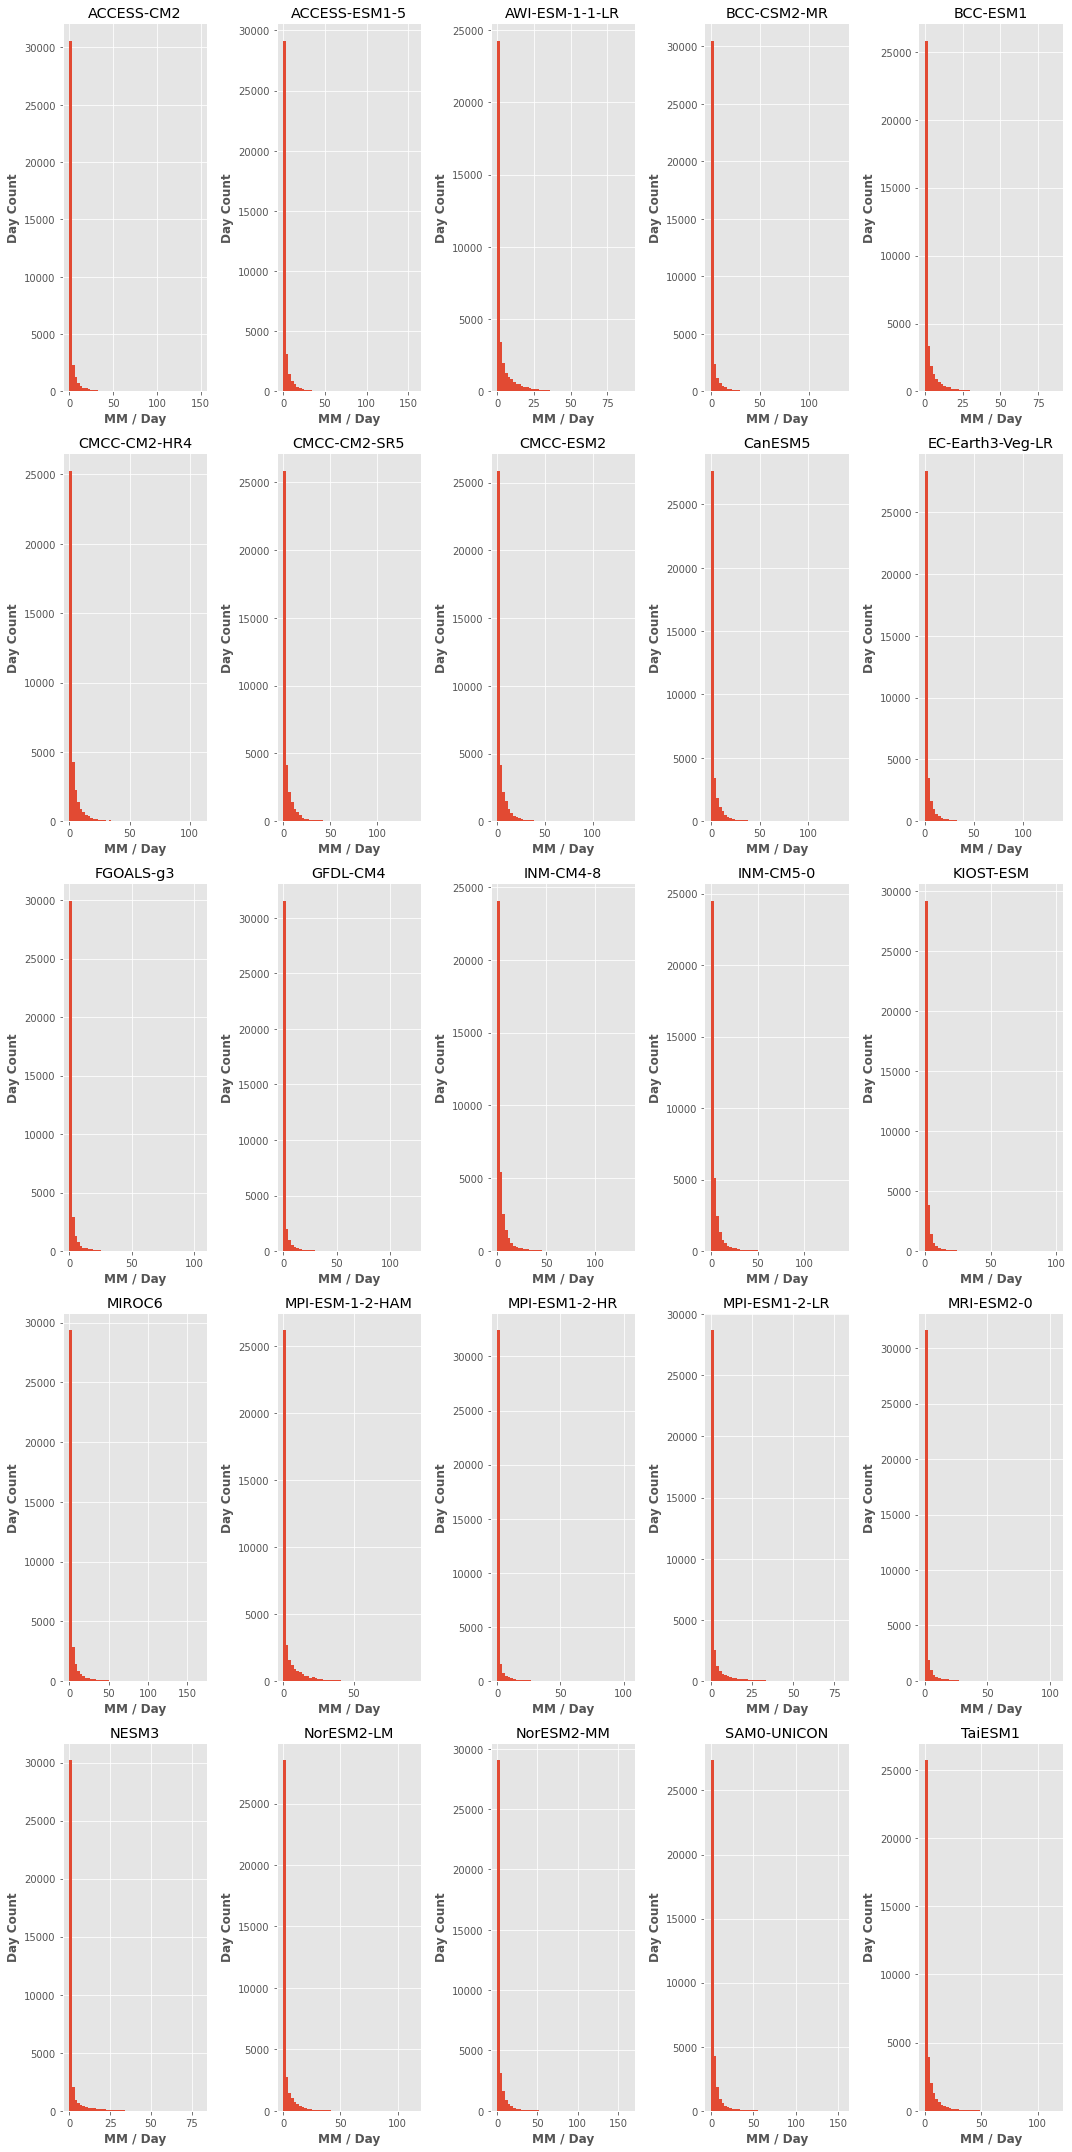

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 30))
axes = axes.ravel()

for i, column in enumerate(X_train.columns):
    X_train[column].hist(ax=axes[i], bins=50)
    axes[i].set_title(column)
    axes[i].set_xlabel('MM / Day')
    axes[i].set_ylabel('Day Count')
    
fig.tight_layout()
plt.show()


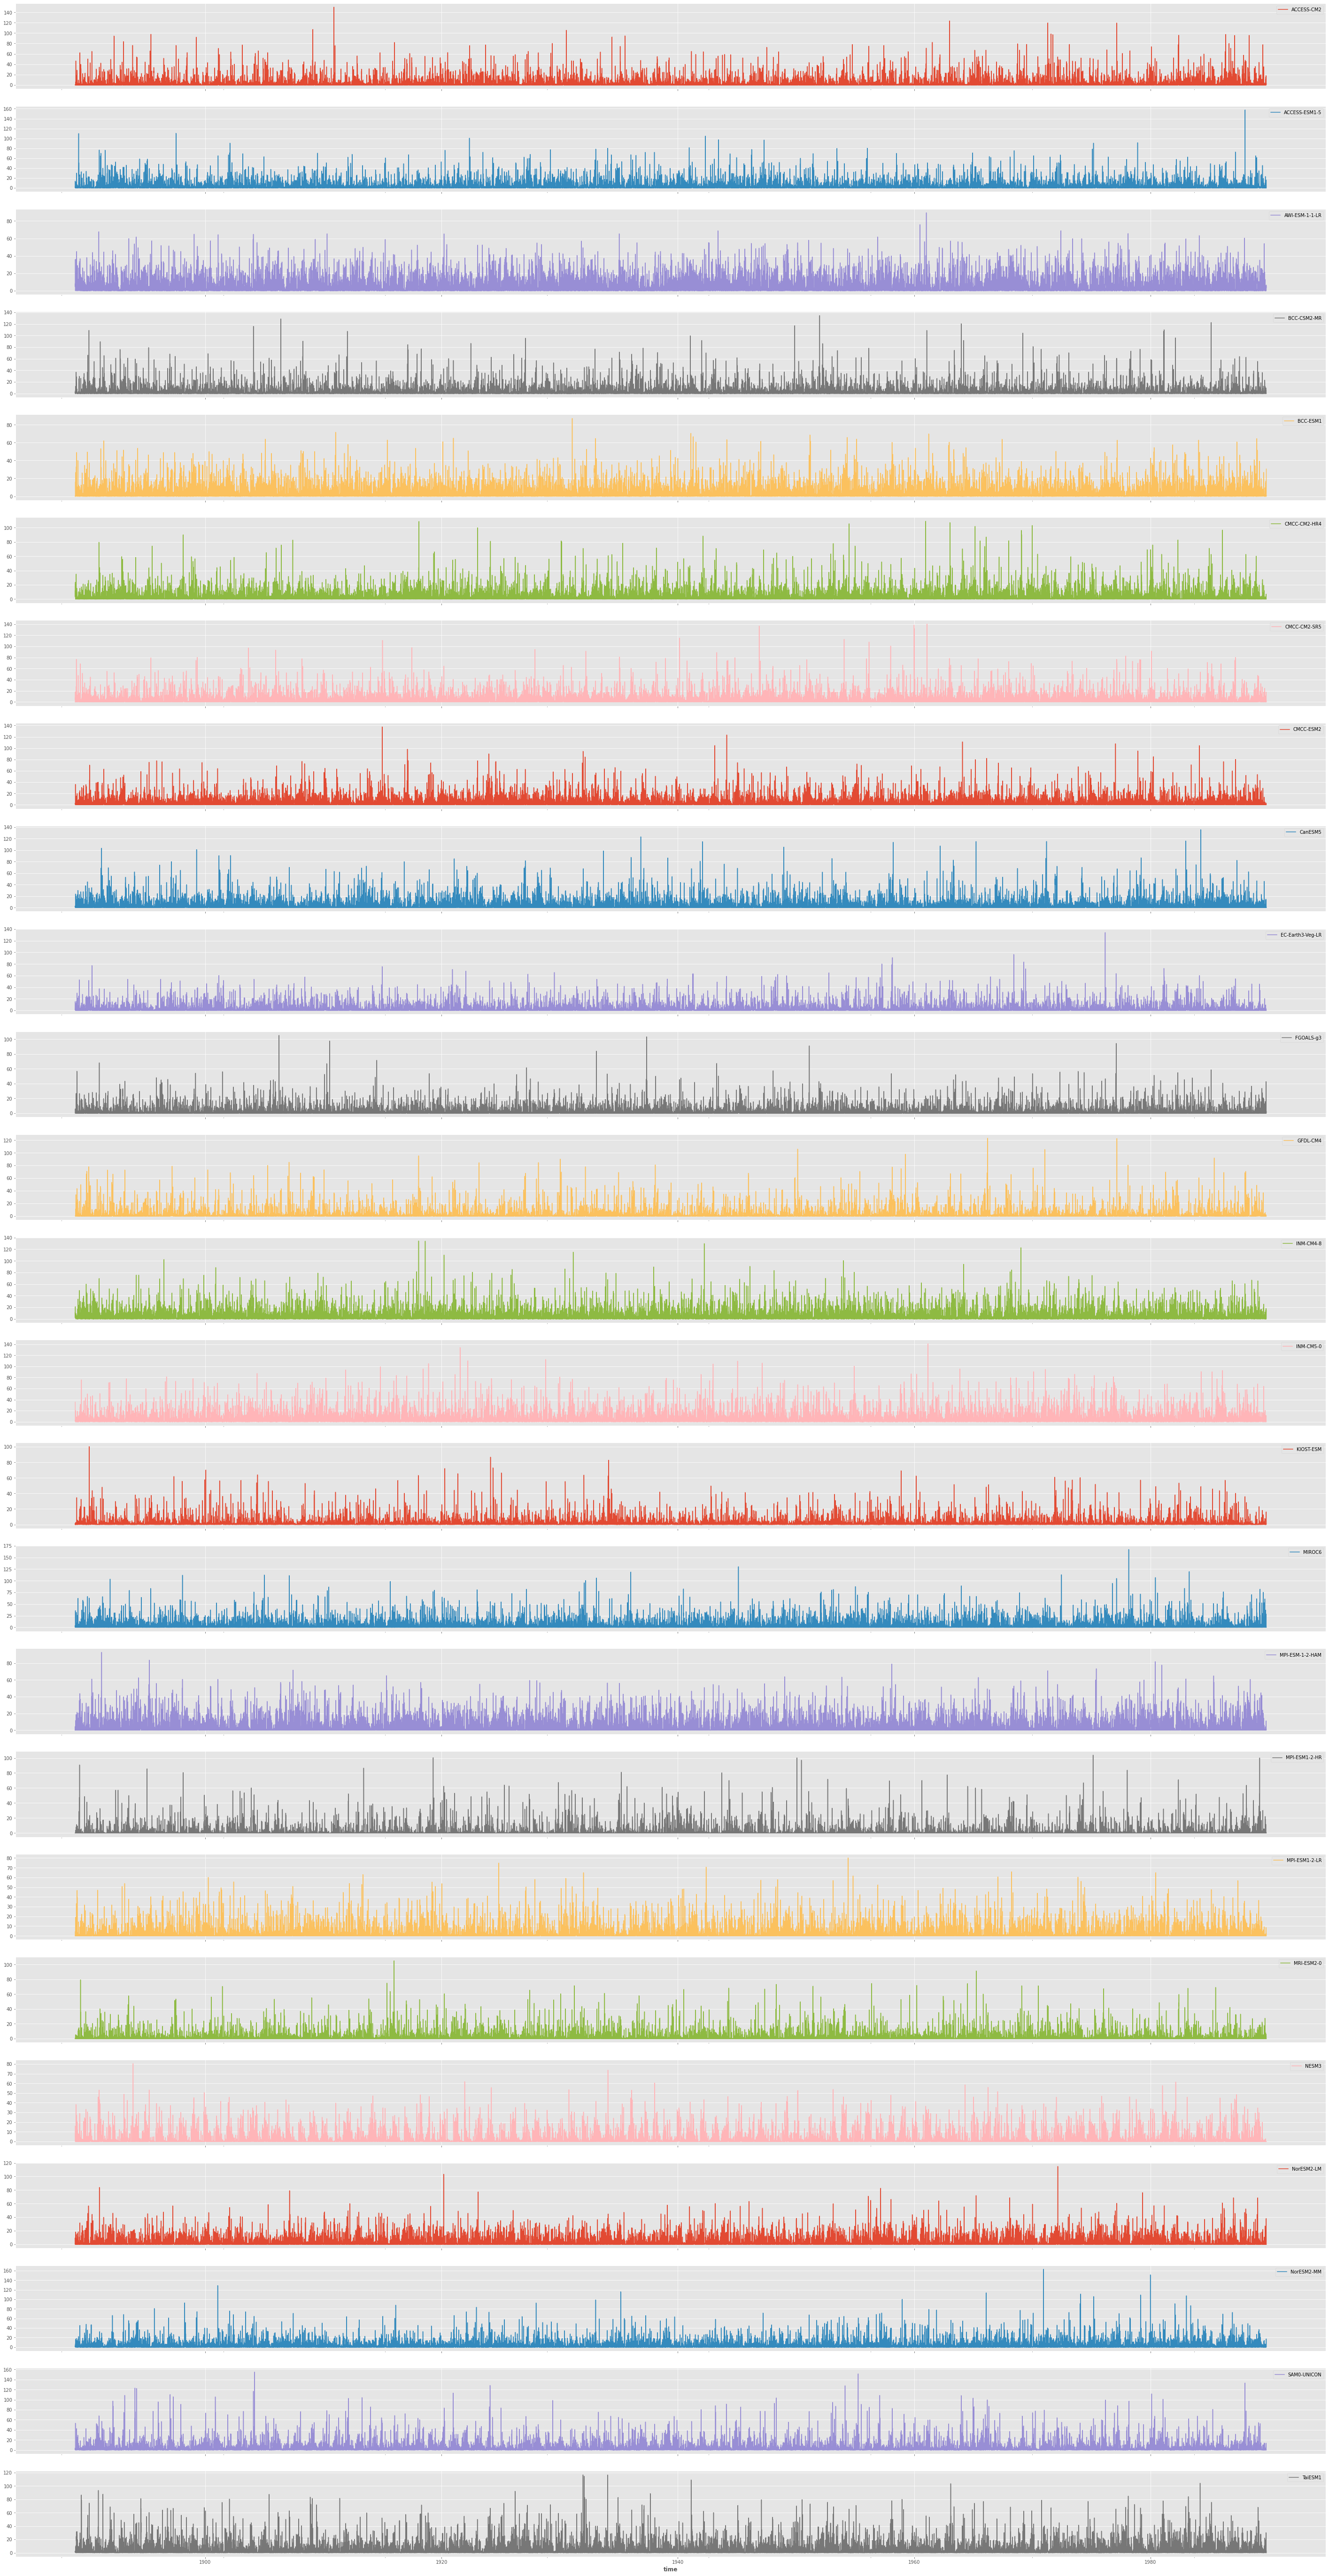

In [11]:
axes = X_train.plot.line(subplots=True, figsize=(50, 100))
plt.show()

In [12]:
# Step 5: Train ensemble machine learning model using RandomForestRegressor and 
# evaluate with metric of your choice (e.g., RMSE) by considering Observed
# as the target column.
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor()
regr.fit(X_train, y_train)


RandomForestRegressor()

In [13]:
# Making a pandas dataframe for the model's RMSE. 
from sklearn.metrics import mean_squared_error

RMSE_table = {
    "model": ["Ensemble model (RandomForestReg)"], 
    "RMSE": [mean_squared_error(y_train, regr.predict(X_train), squared=False)]
}

In [14]:
# Update the dataframe with more models' RMSEs. 
for model in X_train.columns:
    RMSE_table["model"].append(model)
    rmse = mean_squared_error(y_train, X_train[model], squared=False)
    RMSE_table["RMSE"].append(rmse)

In [15]:
RMSE_comparison = pd.DataFrame(RMSE_table).set_index("model").round(2)
RMSE_comparison

,RMSE
model,
Ensemble model (RandomForestReg),3.23
ACCESS-CM2,10.71
ACCESS-ESM1-5,10.68
AWI-ESM-1-1-LR,10.95
BCC-CSM2-MR,10.46
BCC-ESM1,10.24
CMCC-CM2-HR4,10.53
CMCC-CM2-SR5,11.12
CMCC-ESM2,10.88


**Step 6: Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? (Recall that individual columns in the data are predictions of different climate models.)**

Root Mean Squared Error (RMSE) evaluates how close our predictions are to the observed data. Lower RMSE value means the predictions are more accurate. From the table above, we can see that the ensemble model worked better than any other individual models. This is because emsemble model takes the strengths of different models and combine to make more accurate predictions. 

One thing to keep in mind is that our default ensemble model is likely overfitted since we did not limit the number of estimators and max tree depth. In part 2, we will continue to work with this model in the EMR notebook and find the best hyperparameter for the ensemble model. 

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete Question 4 (`Milestone3-task4.ipynb`) from the milestone 3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the Question 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [16]:
# Just replace ___ with the numbers you found from Milestone3-task4.ipynb
model = RandomForestRegressor(n_estimators=100, max_depth=5)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5)

In [17]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 8.10
 Test RMSE: 7.81


In [18]:
# ready to deploy
# where this model is saved? Understand the concept of relative path.
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).*** Web console is also completely fine as it is a small file.